In [1]:
import tessreduce as tr
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import lightkurve as lk
from astropy.coordinates import SkyCoord
from astropy import units as u


#where we're going we dont need warnings!!
import warnings
warnings.filterwarnings("ignore")

cvs = pd.read_csv('./data/cataclysmic_variables.csv')

# don't want to deal with the crowded Tuc, Pav, or Sgr zones for now
ind = (cvs['GCVS'].values == 'Tuc      ') | (cvs['GCVS'].values == 'Pav      ') | (cvs['GCVS'].values == 'Sgr      ')
cvs = cvs.iloc[~ind]

In [2]:
cvs['GCVS'].values

array(['EF Tuc   ', 'FI Cas   ', 'V402 And ', ..., 'V731 Cas ',
       'Scl      ', 'Peg4     '], dtype=object)

In [9]:
import matplotlib
matplotlib.use('Agg')
import tessreduce as tr
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import lightkurve as lk
from astropy.coordinates import SkyCoord
from astropy import units as u

import os
dirname = os.path.dirname('/Users/rridden/Documents/work/code/tess/tesscvs/')

#where we're going we dont need warnings!!
import warnings
warnings.filterwarnings("ignore")

file = os.path.join(dirname,'/data/cataclysmic_variables.csv')
cvs = pd.read_csv('./data/cataclysmic_variables.csv')

# don't want to deal with the crowded Tuc, Pav, or Sgr zones for now
ind = (cvs['GCVS'].values == 'Tuc      ') | (cvs['GCVS'].values == 'Pav      ') | (cvs['GCVS'].values == 'Sgr      ')
cvs = cvs.iloc[~ind]


for j in range(len(cvs)):
    cv = cvs.iloc[j]
    print('NAME: ',cv['Names'])
    ra = cv['RAJ2000']
    dec = cv['DEJ2000']

    obs = tr.spacetime_lookup(ra=ra, dec=dec)
    lcs = []
    t1 = []
    t2 = []
    sectors = []
    for ob in obs:
        try:
            tt = tr.tessreduce(obs_list=ob,reduce=True)
            tt.to_flux()
            lcs += [tt.lc]
            sectors += [tt.tpf.sector]
        except:
            print('Failed for ', ob)


    name = cv['Names']
    print('MAKE FIGURE')
    plt.figure(figsize=(6.5,8))
    plt.subplot(311)
    plt.title(name)
    for i in range(len(lcs)):
        plt.plot(lcs[i][0],lcs[i][1],label='S ' + str(sectors[i]))
    plt.legend()
    plt.ylabel('mJy')

    plt.subplot(312)
    plt.title('trend method 1')
    for i in range(len(lcs)):
        plt.plot(t1[i][0],t1[i][1])
    plt.ylabel('mJy')

    plt.subplot(313)
    plt.title('trend method 2')
    for i in range(len(lcs)):
        #plt.fill_between(lcs[i][0],lcs[i][1]-trends2[i]-err[i],lcs[i][1]-trends2[i]+err[i],alpha=.5)
        plt.plot(t2[i][0],t2[i][1])
    plt.ylabel('mJy')
    plt.xlabel('MJD')
    plt.tight_layout()

    savename = name.replace('/',' ').replace(' ','_')
    plt.savefig('./figs/{}.pdf'.format(savename))

    # save to cvs
    print('SAVE TO CSV')
    mjd = lcs[0][0].copy()
    flux = lcs[0][1].copy()
    e = lcs[0][2].copy()
    s = np.ones(len(lcs[0][0])) * sectors[0]
    for i in range(len(lcs)-1):
        i += 1
        mjd = np.append(mjd,lcs[i][0])
        flux = np.append(flux,lcs[i][1])
        e = np.append(e,lcs[i][2])

        ss = np.ones(len(lcs[i][0])) * sectors[i]
        s = np.append(s,ss)
    df = pd.DataFrame(columns=['mjd','flux','err','trend1','trend2','sector'])
    df['mjd'] = mjd
    df['flux'] = flux
    df['err'] = e
    df['sector'] = s
    
    df.to_csv('./lcs/{}.csv'.format(savename),index=False)

    print('finished {}'.format(name))

NAME:  1RXS J0001-6707
!!! WARNING no MJD time specified, using default of 59000
|   Sector | Covers   |   Time difference  |
|          |          |             (days) |
|----------+----------+--------------------|
|        1 | False    |               -648 |
|       27 | False    |                 34 |
|       28 | False    |                 60 |
getting TPF from TESScut
made reference
made source mask
calculating background
background subtracted
calculating centroids
!!Re-running for difference image!!
shifting images
remade mask
background
Background correlation correction
Field calibration
Target is below -30 dec, calibrating to SkyMapper photometry.
getting TPF from TESScut
made reference
made source mask
calculating background
background subtracted
calculating centroids
!!Re-running for difference image!!
shifting images
remade mask
background
Background correlation correction
Field calibration
Target is below -30 dec, calibrating to SkyMapper photometry.
could not cluster
getti

ValueError: Length of values (14867) does not match length of index (8067)

In [6]:
len(lcs)

1

made reference
made source mask
calculating background
background subtracted
calculating centroids
images shifted
Target is too far south with Dec = -67.1286944 for PS1 photometry. Can not calibrate at this time.
made light curve
2
made reference
made source mask
calculating background
background subtracted
calculating centroids
images shifted
Target is too far south with Dec = -67.1286944 for PS1 photometry. Can not calibrate at this time.
made light curve
2
3
made reference
made source mask
calculating background
background subtracted
calculating centroids
images shifted
Target is too far south with Dec = -67.1286944 for PS1 photometry. Can not calibrate at this time.
made light curve
20
93
finished 1RXS J0001-6707


Exception in thread ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Thread-4:
Traceback (most recent call last):
  File "/Users/rridden/miniconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Users/rridden/miniconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 558, in run
    self.terminate_broken(bpe)
  File "/Users/rridden/miniconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 736, in terminate_broken
    self.kill_workers()
  File "/Users/rridden/miniconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 766, in kill_workers
    recursive_terminate(p)
  File "/Users/rridden/miniconda3/lib/python3.8/site-packages/joblib/externals/loky/backend/utils.py", line 28, in recursive_terminate
    _recursive_terminate_without_psutil(process)
  File "/Users/rridden/miniconda3/lib/python3.8/site-packages/jo

Traceback (most recent call last):
  File "/Users/rridden/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-d5c3ba420fa0>", line 22, in <module>
    tpf = t.download(cutout_size=90)
  File "/Users/rridden/miniconda3/lib/python3.8/site-packages/lightkurve/utils.py", line 479, in wrapper
    return f(*args, **kwargs)
  File "/Users/rridden/miniconda3/lib/python3.8/site-packages/lightkurve/search.py", line 235, in download
    return self._download_one(table=self.table[:1],
  File "/Users/rridden/miniconda3/lib/python3.8/site-packages/lightkurve/search.py", line 148, in _download_one
    path = self._fetch_tesscut_path(table[0]['target_name'],
  File "/Users/rridden/miniconda3/lib/python3.8/site-packages/lightkurve/search.py", line 389, in _fetch_tesscut_path
    cutout_path = TesscutClass().download_cutouts(coords, size=cutout_size,
  File "/Users/rridden/minicon

TypeError: object of type 'NoneType' has no len()

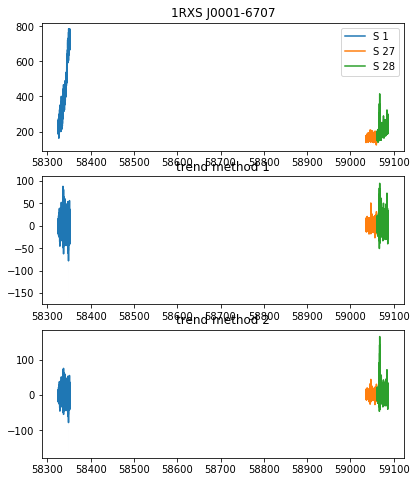

In [34]:
for j in range(len(cvs)):
    cv = cvs.iloc[j]

    ra = cv['RAJ2000']
    dec = cv['DEJ2000']

    c = SkyCoord(ra=float(ra)*u.degree, dec=float(dec) *u.degree, frame='icrs')

    tess = lk.search_tesscut(c,sector=None)

    if len(tess) > 0:
        lcs = []
        zps = []
        err = []
        sectors = []
        trends1 = []
        trends2 = []

        if len(tess) > 1:
            tpfs = []
            for t in tess:
                tpf = t.download(cutout_size=90)
                aper_b18 = np.zeros(tpf.shape[1:], dtype=bool)
                aper_b18[44:48, 44:47] = True
                res = tr.Quick_reduce(tpf,aper=aper_b18)
                lcs += [res['lc']]
                err += [res['err']]
                zps += [res['zp']]
                sectors += [tpf.sector]
                trends1 += [tr.Remove_stellar_variability(lcs[-1],err[-1],variable=True)]
                trends2 +=  [tr.Remove_stellar_variability(lcs[-1],err[-1],variable=False)]
                

            name = cv['Names']
            plt.figure(figsize=(6.5,8))
            plt.subplot(311)
            plt.title(name)
            for i in range(len(lcs)):
                plt.plot(lcs[i][0],lcs[i][1],label='S ' + str(sectors[i]))
            plt.legend()

            plt.subplot(312)
            plt.title('trend method 1')
            for i in range(len(lcs)):
                plt.fill_between(lcs[i][0],lcs[i][1]-trends1[i]-err[i],lcs[i][1]-trends1[i]+err[i],alpha=.5)
                plt.plot(lcs[i][0],lcs[i][1]-trends1[i])
            plt.subplot(313)
            plt.title('trend method 2')
            for i in range(len(lcs)):
                plt.fill_between(lcs[i][0],lcs[i][1]-trends2[i]-err[i],lcs[i][1]-trends2[i]+err[i],alpha=.5)
                plt.plot(lcs[i][0],lcs[i][1]-trends2[i])
            savename = name.replace('/',' ').replace(' ','_')
            plt.savefig('./figs/{}.pdf'.format(savename))

            # save to cvs
            mjd = lcs[0][0].copy()
            flux = lcs[0][1].copy()
            e = err[0].copy()
            t1 = trends1[0].copy()
            t2 = trends2[0].copy()
            z = np.ones(len(lcs[0][0])) * zps[0]
            s = np.ones(len(lcs[0][0])) * sectors[0]
            for i in range(len(lcs)-1):
                i += 1
                mjd = np.append(mjd,lcs[i][0])
                flux = np.append(flux,lcs[i][1])
                e = np.append(e,err[i])
                t1 = np.append(t1,trends1[i])
                t2 = np.append(t2,trends2[i])

                zz = np.ones(len(lcs[i][0])) * zps[i]
                ss = np.ones(len(lcs[i][0])) * sectors[i]
                z = np.append(z,zz)
                s = np.append(s,ss)
            df = pd.DataFrame(columns=['mjd','flux','err','trend1','trend2','zp','sector'])
            df['mjd'] = mjd
            df['flux'] = flux
            df['err'] = e
            df['trend1'] = t1
            df['trend2'] = t2
            df['zp'] = z
            df['sector'] = s

            df.to_csv('./lcs/{}.csv'.format(savename),index=False)

            print('finished {}'.format(name))


In [29]:
len(trends2[1])

1267

In [19]:
plt.tight_layout()

3351

In [24]:
len(err[2])

3449

In [31]:
a = tr.Remove_stellar_variability(lcs[1],err[1],variable=True)

2


In [32]:
len(a)

3351